In [3]:
import random
from scipy.stats import norm
import matplotlib.pyplot as plt  
from scipy.stats import beta
import numpy as np

In [4]:
def tit_for_tat(num_trials):
   
    player_a_moves = ["C"]
    player_b_moves = ["C"]

    for _ in range(num_trials - 1):
      
        if player_b_moves[-1] == "C":
            player_a_moves.append("C")
        else:
            player_a_moves.append("D")

       
        opponent_response = random.choice(["C", "D"])
        player_b_moves.append(opponent_response)

    return player_a_moves, player_b_moves

def tit_for_tat_with_threshold(num_rounds, threshold):
    actions_a = []
    actions_b = []

    for round_num in range(1,num_rounds+1):
        if round_num <= threshold:
            actions_a.append("C")
            actions_b.append(random.choice(["C", "D"]))
        else:
            if actions_b[-1] == "C":
                actions_a.append("C")
            else:
                actions_a.append("D")
        opponent_response = random.choice(["C", "D"])
        actions_b.append(opponent_response)
       
            

    return actions_a, actions_b


def one_cooperating_strategy(num_trials):
    player_d_moves=[]
    player_c_moves=[]
    for _ in range(num_trials):
       
        player_d_moves.append(random.choice(["C", "D"]))
        player_c_moves.append("C")
    return player_d_moves, player_c_moves

def both_cooperating_strategy(num_trials):
    player_e_moves=[]
    player_f_moves=[]
    for _ in range(num_trials):
       
        player_e_moves.append("C")
        player_f_moves.append("C")
    return player_e_moves, player_f_moves

"""payoff_matrix = {
    "CC": (11, 11),  # Payoff for mutual cooperation
   "CD": (0, 20),  # Payoff for A: Cooperation, B: Defection
    "DC": (20, 0),  # Payoff for A: Defection, B: Cooperation
   "DD": (9, 9)   # Payoff for mutual defection
}"""
payoff_matrix ={'CC': (11, 11), 'CD': (0, 20), 'DC': (20, 0), 'DD': (9, 9)}


# Simulate trials
num_trials = 300
player_a, player_b = tit_for_tat(num_trials)
player_a1, player_b1 = tit_for_tat_with_threshold(num_trials, threshold=20)
player_a2, player_b2 = one_cooperating_strategy(num_trials)
player_a3, player_b3 = both_cooperating_strategy(num_trials)

mu3 = 4
mu4 =0
sigma = 1
pdf_values_AB=[]
pdf_values_BA=[]
pdf_values1=[]
pdf_values2=[]
pdf_values3=[]


#print(f"Value of A: {player_a}, Value of y: {player_b}")
print("Strategy: Tit-for-Tat")
for round_num, (move_a, move_b) in enumerate(zip(player_a, player_b), start=1):
    print(f"Round {round_num}: Player A moves {move_a}, Player B moves {move_b}")

print("\nStrategy: Tit-for-Tat with Threshold")
for round_num, (move_a, move_b) in enumerate(zip(player_a1, player_b1), start=1):
    print(f"Round {round_num}: Player A moves {move_a}, Player B moves {move_b}")

print("\nStrategy: One Cooperating Strategy")
for round_num, (move_a, move_b) in enumerate(zip(player_a2, player_b2), start=1):
    print(f"Round {round_num}: Player A moves {move_a}, Player B moves {move_b}")


print("\nStrategy: Both Cooperating Strategy")
for round_num, (move_a, move_b) in enumerate(zip(player_a3, player_b3), start=1):
    print(f"Round {round_num}: Player A moves {move_a}, Player B moves {move_b}")


Strategy: Tit-for-Tat
Round 1: Player A moves C, Player B moves C
Round 2: Player A moves C, Player B moves C
Round 3: Player A moves C, Player B moves D
Round 4: Player A moves D, Player B moves C
Round 5: Player A moves C, Player B moves C
Round 6: Player A moves C, Player B moves D
Round 7: Player A moves D, Player B moves D
Round 8: Player A moves D, Player B moves D
Round 9: Player A moves D, Player B moves D
Round 10: Player A moves D, Player B moves D
Round 11: Player A moves D, Player B moves C
Round 12: Player A moves C, Player B moves D
Round 13: Player A moves D, Player B moves C
Round 14: Player A moves C, Player B moves D
Round 15: Player A moves D, Player B moves D
Round 16: Player A moves D, Player B moves D
Round 17: Player A moves D, Player B moves D
Round 18: Player A moves D, Player B moves D
Round 19: Player A moves D, Player B moves C
Round 20: Player A moves C, Player B moves D
Round 21: Player A moves D, Player B moves C
Round 22: Player A moves C, Player B moves

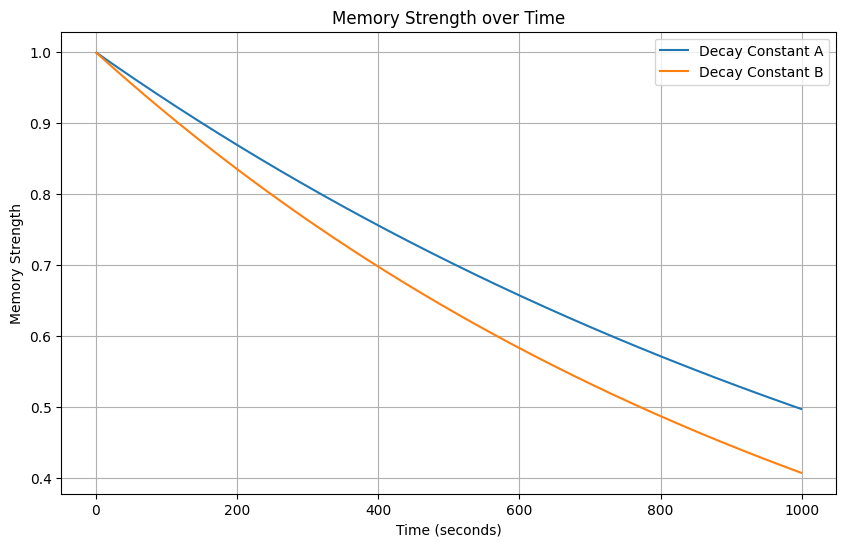

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

def memory_strength(initial_strength, decay_constant, time):
    """
    Calculate memory strength at a given time using an exponential decay model.
    
    Parameters:
        initial_strength (float): Initial strength of memory.
        decay_constant (float): Decay constant determining the rate of decay.
        time (float): Time elapsed since memory formation.
        
    Returns:
        float: Memory strength at the given time.
    """
    return initial_strength * math.exp(-decay_constant * time)

# Define parameters
initial_strength = 1.0  # Initial strength of memory
decay_constant_A = 0.0007   # Decay constant
decay_constant_B = 0.0009
# Time range from 0 to 100 seconds with 0.1 second intervals
time_range = np.arange(1, 1000, 1)

# Calculate memory strength at each time point
memory_strength_values_A = [memory_strength(initial_strength, decay_constant_A, t) for t in time_range]
#print(memory_strength_values)
# Calculate memory strength at each time point
memory_strength_values_B = [memory_strength(initial_strength, decay_constant_B, t) for t in time_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_range, memory_strength_values_A, label='Decay Constant A')
plt.plot(time_range, memory_strength_values_B, label='Decay Constant B')
plt.title('Memory Strength over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Strength')
plt.legend()
plt.grid(True)
plt.show()



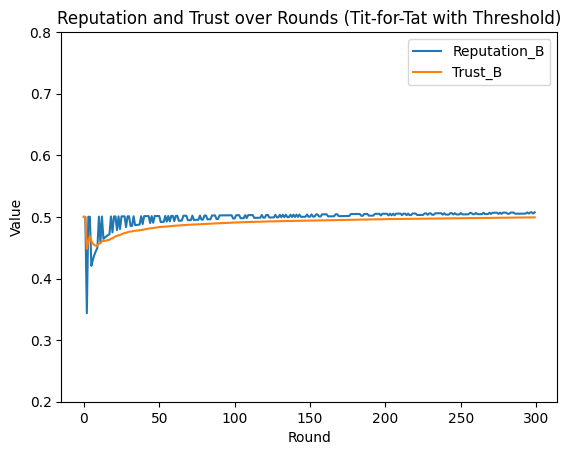

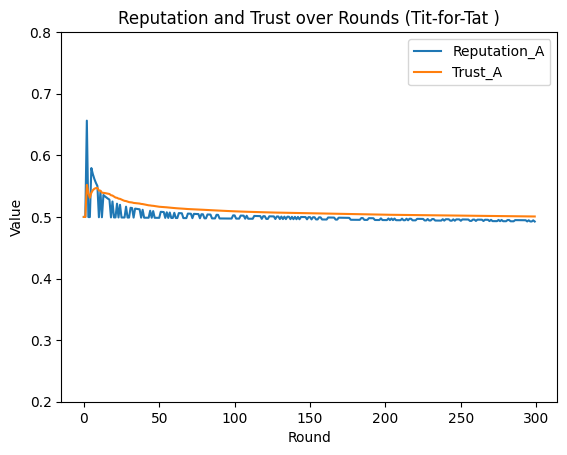

In [7]:
# For the tit-for-tat 
payoffs_a = []
w_payoffs_a = []
payoffs_b = []
w_payoffs_b = []
sum_rep_AB=0
sum_rep_BA=0
#A has for B=AB
trust_values_tit_tat_AB = []
trust_values_tit_tat_BA = []
rep_values_AB=[]
rep_values_BA=[]
for i in range(len(player_a)):
    action_a = player_a[i]
    action_b = player_b[i]
    key = action_a + action_b
    payoffs_a.append(payoff_matrix[key][0])
    payoffs_b.append(payoff_matrix[key][1])
    for j in range(len(payoffs_a)):
        w_payoffs_a.append( memory_strength_values_A[j]*payoffs_a[len(payoffs_a)-j-1])   
        w_payoffs_b.append( memory_strength_values_B[j]*payoffs_b[len(payoffs_b)-j-1])
    if (sum(w_payoffs_a)+sum(w_payoffs_b)) == 0:
        rep_values_AB.append(0.4)  # Set trust value to a default value 
        rep_values_BA.append(0.4)
    else:
        rep_values_AB.append(sum(w_payoffs_a) / (sum(w_payoffs_a)+sum(w_payoffs_b)))
        rep_values_BA.append(sum(w_payoffs_b) / (sum(w_payoffs_a)+sum(w_payoffs_b)))
    w_payoffs_a.clear()
    w_payoffs_b.clear()
    

    for k in range(len(rep_values_AB)):
        sum_rep_AB+=rep_values_AB[k]
        sum_rep_BA+=rep_values_BA[k]
    trust_values_tit_tat_AB.append(sum_rep_AB/(k+1))
    trust_values_tit_tat_BA.append(sum_rep_BA/(k+1))
    sum_rep_AB=0
    sum_rep_BA=0


#print(trust_values_tit_tat_BA)
#print(trust_values_tit_tat_AB)

    
# Plot Rep values and Trust values for tit-for-tat FOR AB 
plt.plot(range(len(rep_values_AB)), rep_values_AB, label='Reputation_B')
plt.plot(range(len(trust_values_tit_tat_AB)), trust_values_tit_tat_AB, label='Trust_B')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Tit-for-Tat with Threshold)')
plt.legend()
plt.ylim(0.2, 0.8)  # Set y-axis limits
plt.show()

# Plot Rep values and Trust values for tit-for-tat FOR BA 
plt.plot(range(len(rep_values_BA)), rep_values_BA, label='Reputation_A')
plt.plot(range(len(trust_values_tit_tat_BA)), trust_values_tit_tat_BA, label='Trust_A')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Tit-for-Tat )')
plt.legend()
plt.ylim(0.2, 0.8)  # Set y-axis limits
plt.show()

 


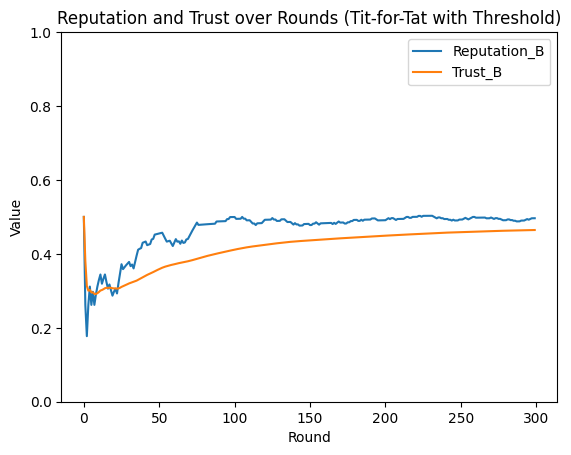

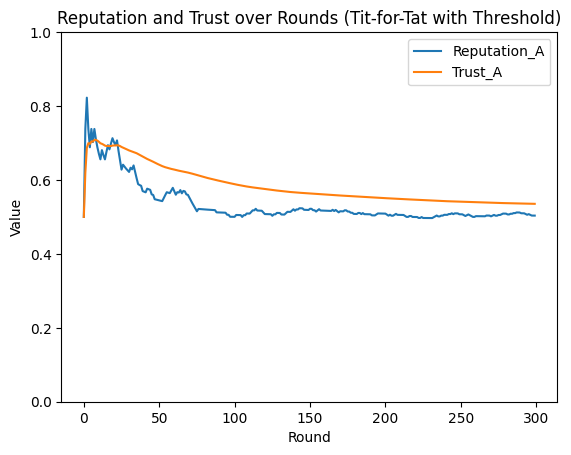

In [8]:
# For the tit-for-tat with threshold strategy
payoffs_a1 = []
w_payoffs_a1 = []
payoffs_b1 = []
w_payoffs_b1 = []
sum_rep_AB1=0
sum_rep_BA1=0
#A has for B=AB
trust_values_tit_tat_AB1 = []
trust_values_tit_tat_BA1= []
rep_values_AB1=[]
rep_values_BA1=[]
for i in range(len(player_a)):
    action_a1 = player_a1[i]
    action_b1 = player_b1[i]
    key = action_a1 + action_b1
    payoffs_a1.append(payoff_matrix[key][0])
    payoffs_b1.append(payoff_matrix[key][1])
    for j in range(len(payoffs_a1)):
        w_payoffs_a1.append( memory_strength_values_A[j]*payoffs_a1[len(payoffs_a1)-j-1])   
        w_payoffs_b1.append( memory_strength_values_B[j]*payoffs_b1[len(payoffs_b1)-j-1])
    if (sum(w_payoffs_a1)+sum(w_payoffs_b1)) == 0:
        rep_values_AB1.append(0.4)  # Set trust value to a default value 
        rep_values_BA1.append(0.4)
    else:
        rep_values_AB1.append(sum(w_payoffs_a1) / (sum(w_payoffs_a1)+sum(w_payoffs_b1)))
        rep_values_BA1.append(sum(w_payoffs_b1) / (sum(w_payoffs_a1)+sum(w_payoffs_b1)))
    w_payoffs_a1.clear()
    w_payoffs_b1.clear()
    for k in range(len(rep_values_AB1)):
        sum_rep_AB1+=rep_values_AB1[k]
        sum_rep_BA1+=rep_values_BA1[k]
    trust_values_tit_tat_AB1.append(sum_rep_AB1/(k+1))
    trust_values_tit_tat_BA1.append(sum_rep_BA1/(k+1))
    sum_rep_AB1=0
    sum_rep_BA1=0


#print(trust_values_tit_tat_BA1)
#print(trust_values_tit_tat_AB1)

    
# Plot Rep values and Trust values for tit-for-tat FOR AB 
plt.plot(range(len(rep_values_AB1)), rep_values_AB1, label='Reputation_B')
plt.plot(range(len(trust_values_tit_tat_AB1)), trust_values_tit_tat_AB1, label='Trust_B')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Tit-for-Tat with Threshold)')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# Plot Rep values and Trust values for tit-for-tat FOR BA 
plt.plot(range(len(rep_values_BA1)), rep_values_BA1, label='Reputation_A')
plt.plot(range(len(trust_values_tit_tat_BA1)), trust_values_tit_tat_BA1, label='Trust_A')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Tit-for-Tat with Threshold)')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits
plt.show()    


[0.5000499999998334, 0.619154920699519, 0.6870327213700618, 0.6998224788387991, 0.6976029619751172, 0.7043801309411205, 0.7143596675077245, 0.7173483248304273, 0.7227799328332586, 0.7243305502210631, 0.7276792362791532, 0.7285651657679634, 0.7278394187397955, 0.7285915548114884, 0.7303627023827424, 0.7328361934724354, 0.7357898961133346, 0.7374914258566596, 0.7396407829477902, 0.7408393305027078, 0.7412931600224159, 0.7411613029957269, 0.7415184030057003, 0.741389887347775, 0.7416760965192901, 0.7423006111062507, 0.7425053430473567, 0.7423623165878224, 0.7425301979156141, 0.7429593819103775, 0.7436083210725368, 0.7439447617109713, 0.7444802598039736, 0.744744643812101, 0.7451898791509817, 0.745790773477911, 0.7461524205543555, 0.7463048909726153, 0.7466086048905763, 0.7467261517645513, 0.7469823808666309, 0.7470718239871401, 0.7470135236622831, 0.747086692492763, 0.7472772263364378, 0.7473313045809477, 0.747263269316933, 0.7473067023516086, 0.7472382703348478, 0.747272859429898, 0.7474

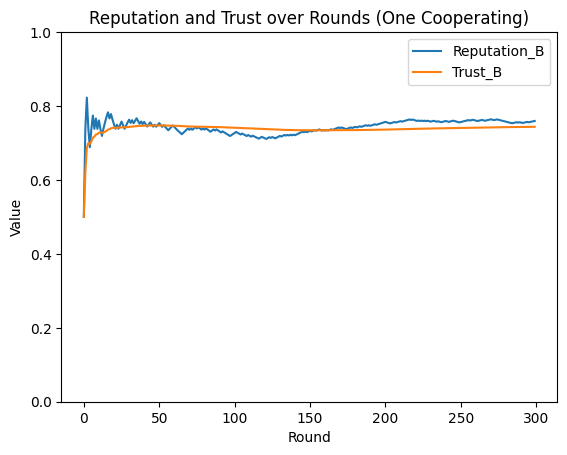

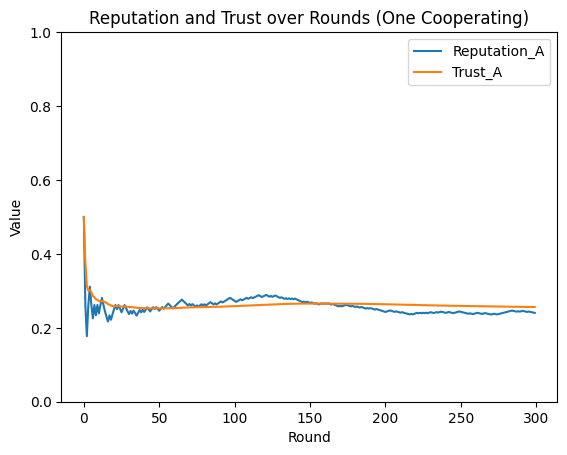

In [9]:
# For one ever co-operating
payoffs_a2 = []
w_payoffs_a2 = []
payoffs_b2 = []
w_payoffs_b2 = []
sum_rep_AB2=0
sum_rep_BA2=0
#A has for B=AB
trust_values_tit_tat_AB2 = []
trust_values_tit_tat_BA2= []
rep_values_AB2=[]
rep_values_BA2=[]
for i in range(len(player_a2)):
    action_a2 = player_a2[i]
    action_b2 = player_b2[i]
    key = action_a2 + action_b2
    payoffs_a2.append(payoff_matrix[key][0])
    payoffs_b2.append(payoff_matrix[key][1])
    for j in range(len(payoffs_a2)):
        w_payoffs_a2.append( memory_strength_values_A[j]*payoffs_a2[len(payoffs_a2)-j-1])   
        w_payoffs_b2.append( memory_strength_values_B[j]*payoffs_b2[len(payoffs_b2)-j-1])
    if (sum(w_payoffs_a2)+sum(w_payoffs_b2)) == 0:
        rep_values_AB2.append(0.4)  # Set trust value to a default value 
        rep_values_BA2.append(0.4)
    else:
        rep_values_AB2.append(sum(w_payoffs_a2) / (sum(w_payoffs_a2)+sum(w_payoffs_b2)))
        rep_values_BA2.append(sum(w_payoffs_b2) / (sum(w_payoffs_a2)+sum(w_payoffs_b2)))
    w_payoffs_a2.clear()
    w_payoffs_b2.clear()
    for k in range(len(rep_values_AB2)):
        sum_rep_AB2+=rep_values_AB2[k]
        sum_rep_BA2+=rep_values_BA2[k]
    trust_values_tit_tat_AB2.append(sum_rep_AB2/(k+1))
    trust_values_tit_tat_BA2.append(sum_rep_BA2/(k+1))
    sum_rep_AB2=0
    sum_rep_BA2=0


#print(trust_values_tit_tat_BA2)
print(trust_values_tit_tat_AB2)

    
# Plot Rep values and Trust values for tit-for-tat FOR AB 
plt.plot(range(len(rep_values_AB2)), rep_values_AB2, label='Reputation_B')
plt.plot(range(len(trust_values_tit_tat_AB2)), trust_values_tit_tat_AB2, label='Trust_B')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (One Cooperating)')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits
plt.show()

# Plot Rep values and Trust values for tit-for-tat FOR BA 
plt.plot(range(len(rep_values_BA2)), rep_values_BA2, label='Reputation_A')
plt.plot(range(len(trust_values_tit_tat_BA2)), trust_values_tit_tat_BA2, label='Trust_A')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (One Cooperating)')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits
plt.show()    



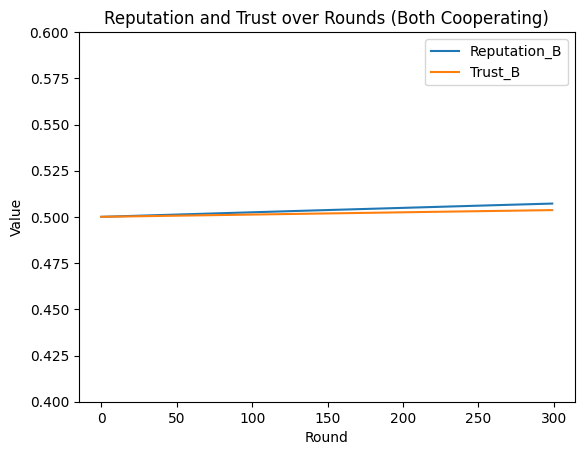

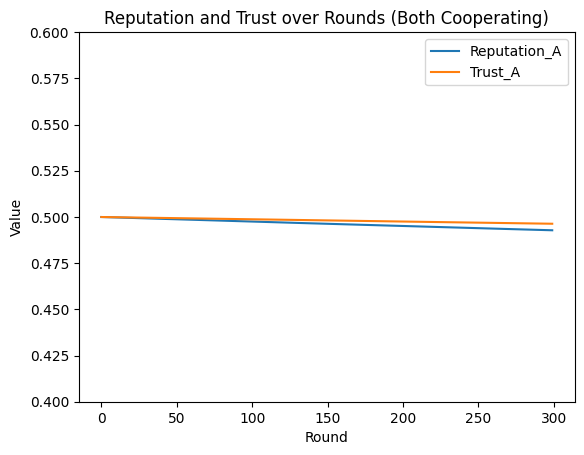

In [10]:
# For both ever co-operating
payoffs_a3= []
w_payoffs_a3 = []
payoffs_b3 = []
w_payoffs_b3 = []
sum_rep_AB3=0
sum_rep_BA3=0
#A has for B=AB
trust_values_tit_tat_AB3 = []
trust_values_tit_tat_BA3= []
rep_values_AB3=[]
rep_values_BA3=[]
for i in range(len(player_a3)):
    action_a3 = player_a3[i]
    action_b3 = player_b3[i]
    key = action_a3 + action_b3
    payoffs_a3.append(payoff_matrix[key][0])
    payoffs_b3.append(payoff_matrix[key][1])
    for j in range(len(payoffs_a3)):
        w_payoffs_a3.append( memory_strength_values_A[j]*payoffs_a3[len(payoffs_a3)-j-1])   
        w_payoffs_b3.append( memory_strength_values_B[j]*payoffs_b3[len(payoffs_b3)-j-1])
    if (sum(w_payoffs_a3)+sum(w_payoffs_b3)) == 0:
        rep_values_AB3.append(0.4)  # Set trust value to a default value 
        rep_values_BA3.append(0.4)
    else:
        rep_values_AB3.append(sum(w_payoffs_a3) / (sum(w_payoffs_a3)+sum(w_payoffs_b3)))
        rep_values_BA3.append(sum(w_payoffs_b3) / (sum(w_payoffs_a3)+sum(w_payoffs_b3)))
    w_payoffs_a3.clear()
    w_payoffs_b3.clear()
    for k in range(len(rep_values_AB3)):
        sum_rep_AB3+=rep_values_AB3[k]
        sum_rep_BA3+=rep_values_BA3[k]
    trust_values_tit_tat_AB3.append(sum_rep_AB3/(k+1))
    trust_values_tit_tat_BA3.append(sum_rep_BA3/(k+1))
    sum_rep_AB3=0
    sum_rep_BA3=0


#print(rep_values_AB3)
#print(trust_values_tit_tat_AB3)

    
# Plot Rep values and Trust values for tit-for-tat FOR AB 
plt.plot(range(len(rep_values_AB3)), rep_values_AB3, label='Reputation_B')
plt.plot(range(len(trust_values_tit_tat_AB3)), trust_values_tit_tat_AB3, label='Trust_B')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Both Cooperating)')
plt.legend()
plt.ylim(0.4, 0.6)  # Set y-axis limits
plt.show()

# Plot Rep values and Trust values for tit-for-tat FOR BA 
plt.plot(range(len(rep_values_BA3)), rep_values_BA3, label='Reputation_A')
plt.plot(range(len(trust_values_tit_tat_BA3)), trust_values_tit_tat_BA3, label='Trust_A')
plt.xlabel('Round')
plt.ylabel('Value')
plt.title('Reputation and Trust over Rounds (Both Cooperating)')
plt.legend()
plt.ylim(0.4, 0.6)  # Set y-axis limits
plt.show()    



In [8]:
payoff_matrix = {
    "CC": (1, 1),  # Payoff for mutual cooperation
    "CD": (-10, 10),  # Payoff for A: Cooperation, B: Defection
    "DC": (10, -10),  # Payoff for A: Defection, B: Cooperation
    "DD": (-1, -1)   # Payoff for mutual defection
}

# Find the minimum payoff value
min_payoff = min(min(payoff) for payoff in payoff_matrix.values())

# Subtract the minimum payoff value from all payoffs to normalize
normalized_payoff_matrix = {
    key: tuple(payoff - min_payoff for payoff in value)
    for key, value in payoff_matrix.items()
}

print(normalized_payoff_matrix)


{'CC': (11, 11), 'CD': (0, 20), 'DC': (20, 0), 'DD': (9, 9)}


In [9]:
import numpy as np

payoff_matrix = {
    "CC": (1, 1),  # Payoff for mutual cooperation
    "CD": (-10, 10),  # Payoff for A: Cooperation, B: Defection
    "DC": (10, -10),  # Payoff for A: Defection, B: Cooperation
    "DD": (-1, -1)   # Payoff for mutual defection
}

# Extract the payoffs
all_payoffs = [payoff for payoffs in payoff_matrix.values() for payoff in payoffs]

# Calculate mean and standard deviation
mean_payoff = np.mean(all_payoffs)
std_dev_payoff = np.std(all_payoffs)

# Standardize the payoffs
standardized_payoff_matrix = {
    key: tuple((payoff - mean_payoff) / std_dev_payoff for payoff in value)
    for key, value in payoff_matrix.items()
}

print(standardized_payoff_matrix)


{'CC': (0.14071950894605836, 0.14071950894605836), 'CD': (-1.4071950894605838, 1.4071950894605838), 'DC': (1.4071950894605838, -1.4071950894605838), 'DD': (-0.14071950894605836, -0.14071950894605836)}
